In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Import figure settings for Colab & auxiliary functions

In [ ]:
def plot_history(history):
  fig = plt.figure(figsize=(6,4), dpi=100)
  plt.xlabel('Epoch')
  plt.ylabel('Mean squared error (avg)')
  plt.semilogy(history.epoch, np.array(history.history['loss']), 
           label='Train')
  plt.semilogy(history.epoch, np.array(history.history['val_loss']),
           label = 'Valid')
  plt.legend()
  plt.show()#ylim([0,max(history.history['val_loss'])])
  fig.savefig("demo.png", dpi=400)
  files.download("demo.png") 

# Multilayer perceptron (MLP)

#### Define NN and train

In [ ]:
# the training set is only composed of 1/2 walls in a same function.
x = np.loadtxt('drive/MyDrive/colab_data/vspeedu0-coarse.csv', delimiter=',')
y = np.loadtxt('drive/MyDrive/colab_data/vspeedu0-fine.csv', delimiter=',')

# the testing set has 2,3,4,5 walls.
#xtest = np.loadtxt('drive/MyDrive/colab_data/new-xwall50-1000.csv', delimiter=',')
#ytest = np.loadtxt('drive/MyDrive/colab_data/new-ywall50-1000.csv', delimiter=',')

int_dim = x.shape[1]
out_dim = y.shape[1]

print(f'input dim: {int_dim}')
print(f'output dim: {out_dim}')

input dim: 51
output dim: 501


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10)

act = "relu" # tanh activation function

model = Sequential()

model.add(Dense(64, input_dim = int_dim, activation = act))
model.add(Dense(64, activation = act))
model.add(Dense(64, activation = act))
model.add(Dense(out_dim, activation = 'sigmoid'))
model.compile(loss="mse", optimizer="adam")

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3328      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 501)               32565     
Total params: 44,213
Trainable params: 44,213
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(xtrain.shape)

(4500, 51)


In [ ]:
tf.keras.backend.clear_session()
history = model.fit(xtrain, ytrain, epochs=500, batch_size=32, verbose=0, validation_split=0.2)

In [ ]:
ypred = model.predict(xtrain)
training_loss = tf.keras.losses.MSE(ytrain, ypred)
print("train. loss: ", np.mean(training_loss))

ypred = model.predict(xtest)
test_loss = tf.keras.losses.MSE(ytest, ypred)
print("test. loss: ", np.mean(test_loss))
print("max test. loss: ", np.max(test_loss))

print(test_loss[np.argmax(test_loss)])

train. loss:  0.00023540958
test. loss:  0.00045547003
max test. loss:  0.054696396
tf.Tensor(0.054696396, shape=(), dtype=float32)


#### Plot some results

In [ ]:
import matplotlib.pyplot as plt

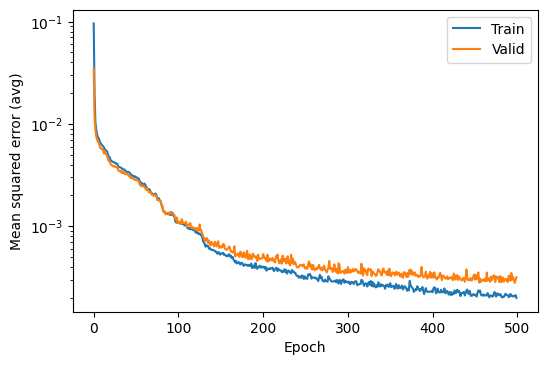

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plot_history(history)


In [ ]:
i = np.argmax(test_loss)
i = 18
fig = plt.figure(figsize=(6,4), dpi=100)
x = np.linspace(0,1,int_dim) 
x10 = np.linspace(0,1,out_dim) 
plt.plot(x, xtest[i], label = f'xtest: $N$={int_dim-1} (scheme)')
plt.plot(x10, ypred[i], label=f'ypred: $N$={out_dim-1} (network)')
plt.plot(x10, ytest[i], label=f'ytest: $N$={out_dim-1} (scheme)')
plt.xlabel('$x$')
plt.ylabel('$u$')
#plt.xlim(0.35,0.47)
plt.legend()
plt.show()

#fig.savefig("demo.png", dpi=400)
#files.download("demo.png") 

NameError: ignored

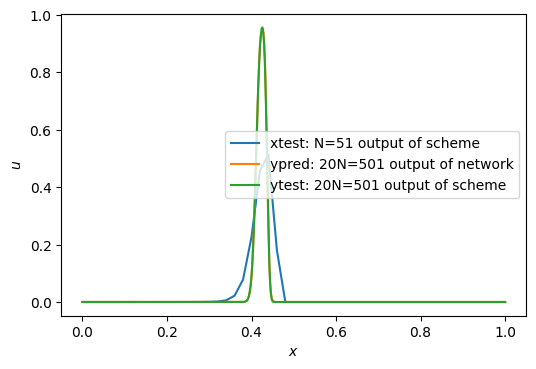

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

ypred = model.predict(xtrain)
'''Plotting the results'''
i = 1
fig = plt.figure(figsize=(6,4), dpi=100)
x = np.linspace(0,1,int_dim) 
x10 = np.linspace(0,1,out_dim) 
plt.plot(x, xtrain[i], label = f'xtest: N={int_dim} output of scheme')
plt.plot(x10, ypred[i], label=f'ypred: 20N={out_dim} output of network')
plt.plot(x10, ytrain[i], label=f'ytest: 20N={out_dim} output of scheme')
plt.xlabel('$x$')
plt.ylabel('$u$')
#plt.xlim(0.35,0.47)
plt.legend()
plt.show()

fig.savefig("demo.png", dpi=400)
files.download("demo.png") 

# Convolutional neural net (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Input, Dropout
from sklearn.model_selection import train_test_split
from google.colab import files
tf.config.run_functions_eagerly(True)

In [ ]:
# the training set is only composed of 1/2 walls in a same function.
xtrain = np.loadtxt('drive/MyDrive/colab_data/new-xwall1-2.csv', delimiter=',')
ytrain = np.loadtxt('drive/MyDrive/colab_data/new-ywall1-2.csv', delimiter=',')

# the testing set has 2,3,4,5 walls.
xtest = np.loadtxt('drive/MyDrive/colab_data/new-xwall50-1000.csv', delimiter=',')
ytest = np.loadtxt('drive/MyDrive/colab_data/new-ywall50-1000.csv', delimiter=',')

int_dim = xtrain.shape[1]
out_dim = ytrain.shape[1]

print(f'input dim: {int_dim}')
print(f'output dim: {out_dim}')

input dim: 50
output dim: 1000


In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
ytrain = ytrain.reshape(ytrain.shape[0], ytrain.shape[1], 1)

xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)
ytest = ytest.reshape(ytest.shape[0], ytest.shape[1], 1)

print(xtrain.shape[1:])
print((int_dim,1))

(50, 1)
(50, 1)


In [ ]:
model = Sequential()
model.add(Input(shape=xtrain.shape[1:]))
model.add(Conv1D(filters=32, kernel_size=10, activation="relu", padding="same"))
model.add(Dropout(rate=0.2))
model.add(Conv1D(filters=32, kernel_size=10, activation="relu", padding="same"))
model.add(Conv1D(filters=32, kernel_size=10, activation="relu", padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim, activation = "sigmoid"))
model.compile(loss="mse", optimizer="adam")

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 50, 32)            352       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 32)            10272     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 50, 32)            10272     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)               

In [ ]:
model.fit(xtrain, ytrain, epochs=100, batch_size=32, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


KeyboardInterrupt: ignored

In [ ]:
ypred = model.predict(xtrain)
training_loss = tf.keras.losses.MSE(ytrain[:,:,0], ypred)
print("train. loss: ", np.mean(training_loss))

ypred = model.predict(xtest)
validation_loss = tf.keras.losses.MSE(ytest[:,:,0], ypred)
print("valid. loss: ", np.mean(validation_loss))
print("i=", np.argmax(validation_loss))

print(validation_loss[np.argmax(validation_loss)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


train. loss:  0.004748637
valid. loss:  0.077071495
i= 2896
tf.Tensor(0.2527886, shape=(), dtype=float32)


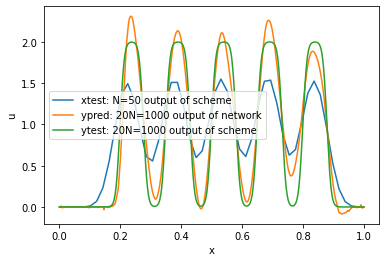

In [ ]:
'''Plotting the results'''

import matplotlib.pyplot as plt
i = np.argmax(validation_loss)
i=9
fig = plt.figure()
x = np.linspace(0,1,int_dim) 
x10 = np.linspace(0,1,out_dim) 
plt.plot(x, xtest[i,:,0], label = f'xtest: N={int_dim} output of scheme')
plt.plot(x10, ypred[i], label=f'ypred: 20N={out_dim} output of network')
plt.plot(x10, ytest[i,:,0], label=f'ytest: 20N={out_dim} output of scheme')
plt.xlabel('x')
plt.ylabel('u')
#plt.xlim(0.35,0.47)
plt.legend()
plt.show()

#fig.savefig("demo.png", dpi=400)
#files.download("demo.png") 